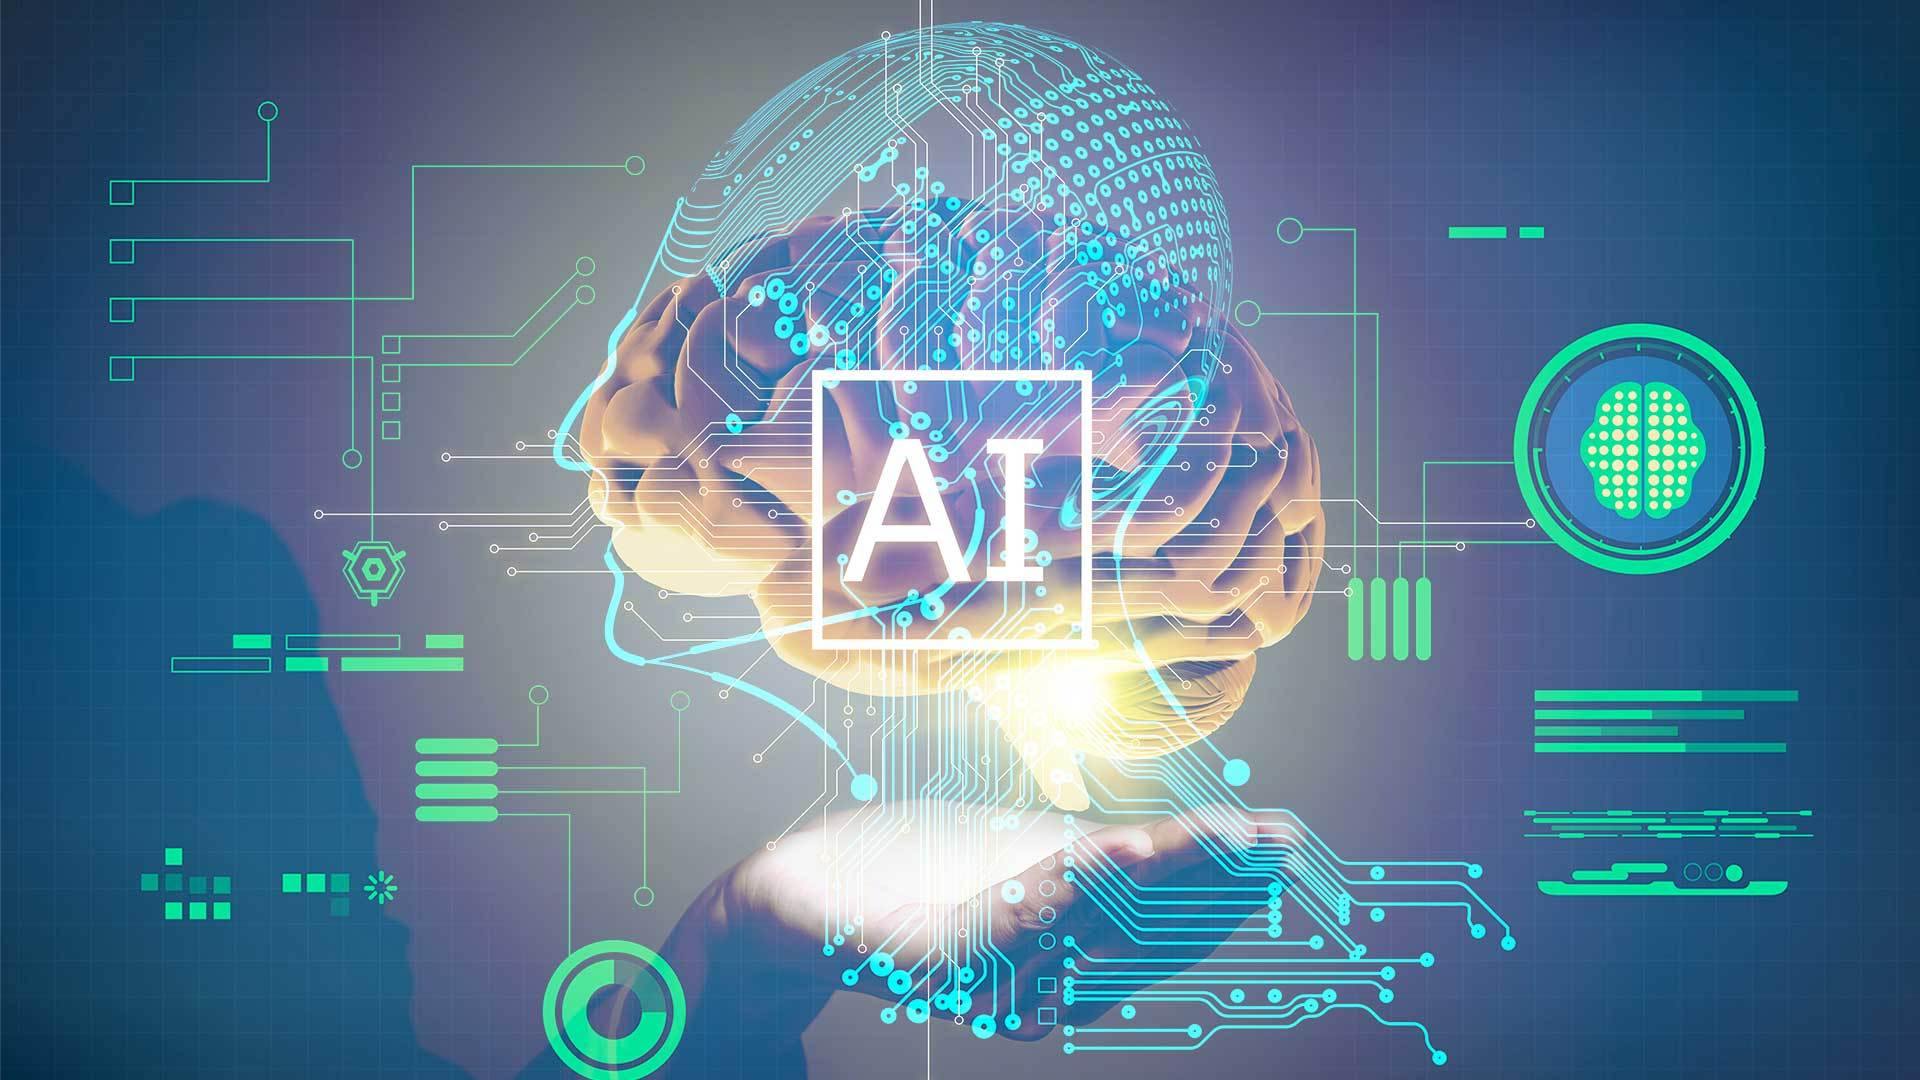

# 신경망(Neural Network)

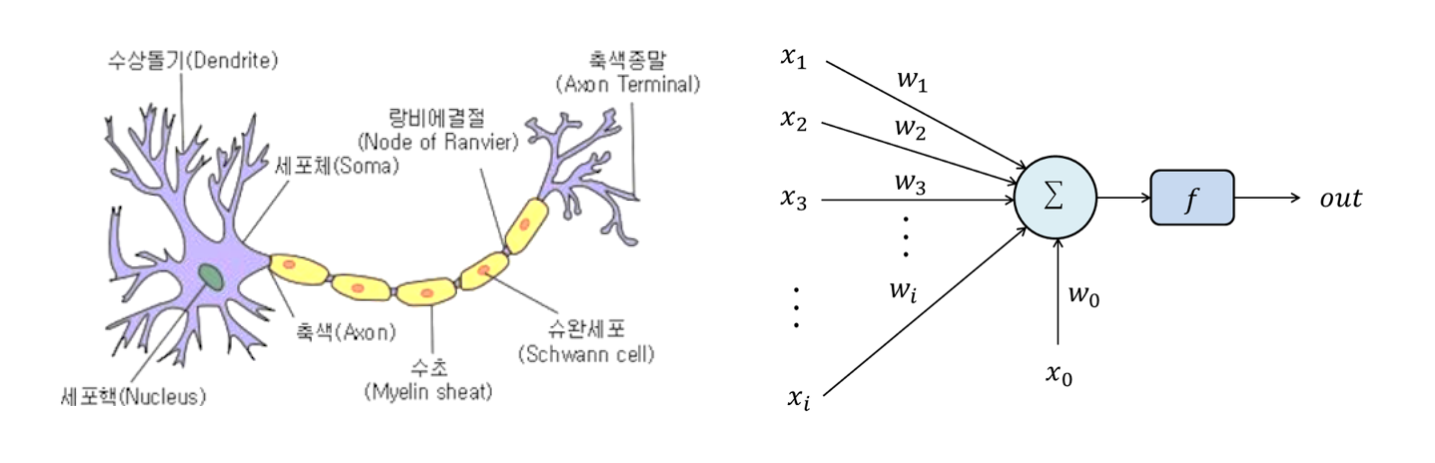

## 퍼셉트론(Perceptron)
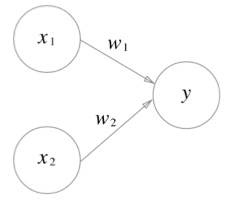

* 다수의 신호를 입력받아 하나의 신호를 출력
* 퍼셉트론은 신호 1, 0 값을 가짐
* 활성 상태일때는 1, 비활성 상태일때는 0을 출력
* 입력이 2개인 퍼셉트론
* x1, x2 는 입력신호
* y는 출력 신호
* w1과  w2는 가중치
* $y = w_1x_1 + w_2x_2$

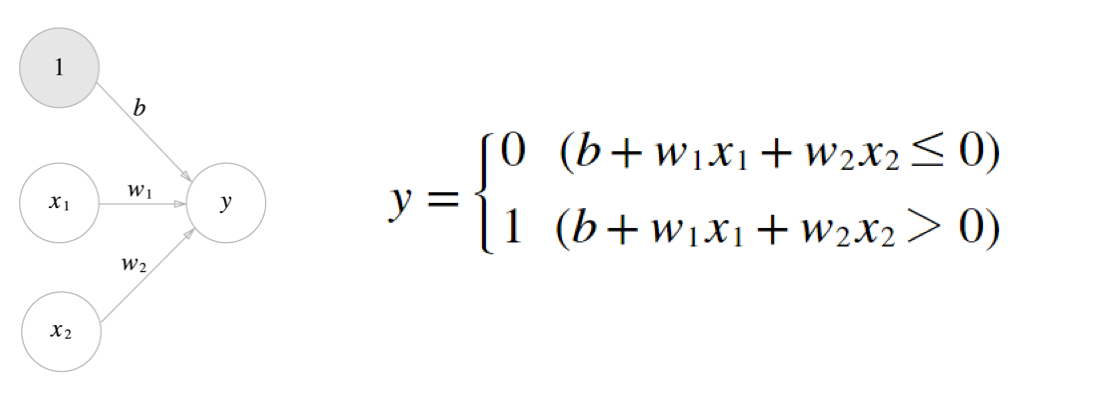

* w는 입력신호(x) 가 결과에 주는 영향력을 조절하는 변수
* 편향은 뉴런이 얼마나 쉽게 활성화 (결과로 1을 출력) 하느냐를 조정하는 매개변수 
* 편향의 값이 -10 이면 sum(입력 신호 * 가중치) 값이 10이 넘어야 활성화 된다는 의미

## $$y = w_1x_1 + w_2x_2 + b$$

## $$ y =  \left[
\begin{matrix}
    x_1 & x_2 \\
\end{matrix}
\right]
\left[
\begin{matrix}
    w_{1} \\
    w_{2} \\
\end{matrix}
\right] + b $$

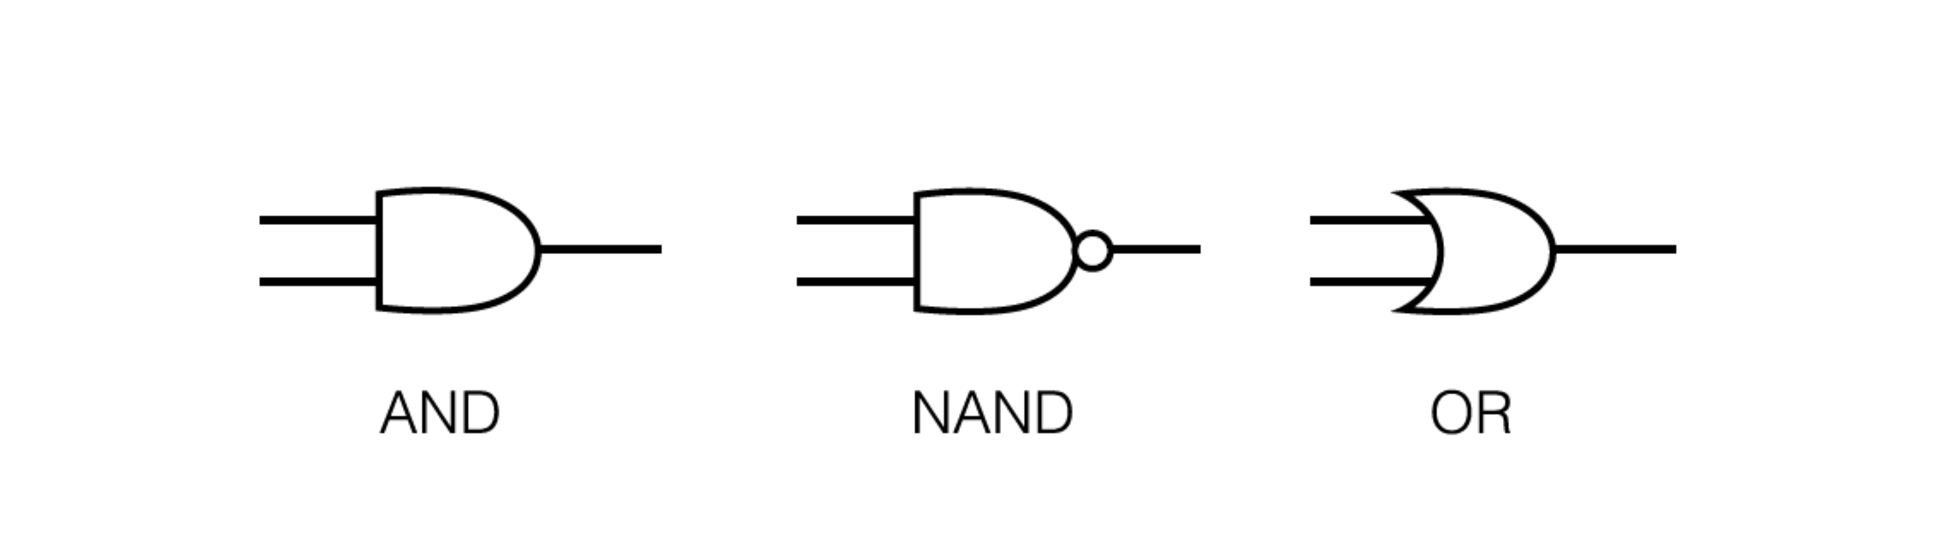

In [ ]:
import numpy as np

In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp =  np.dot(w, x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [ ]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


In [ ]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.dot(w,x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [ ]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = NAND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


In [ ]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.dot(w,x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [ ]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = OR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


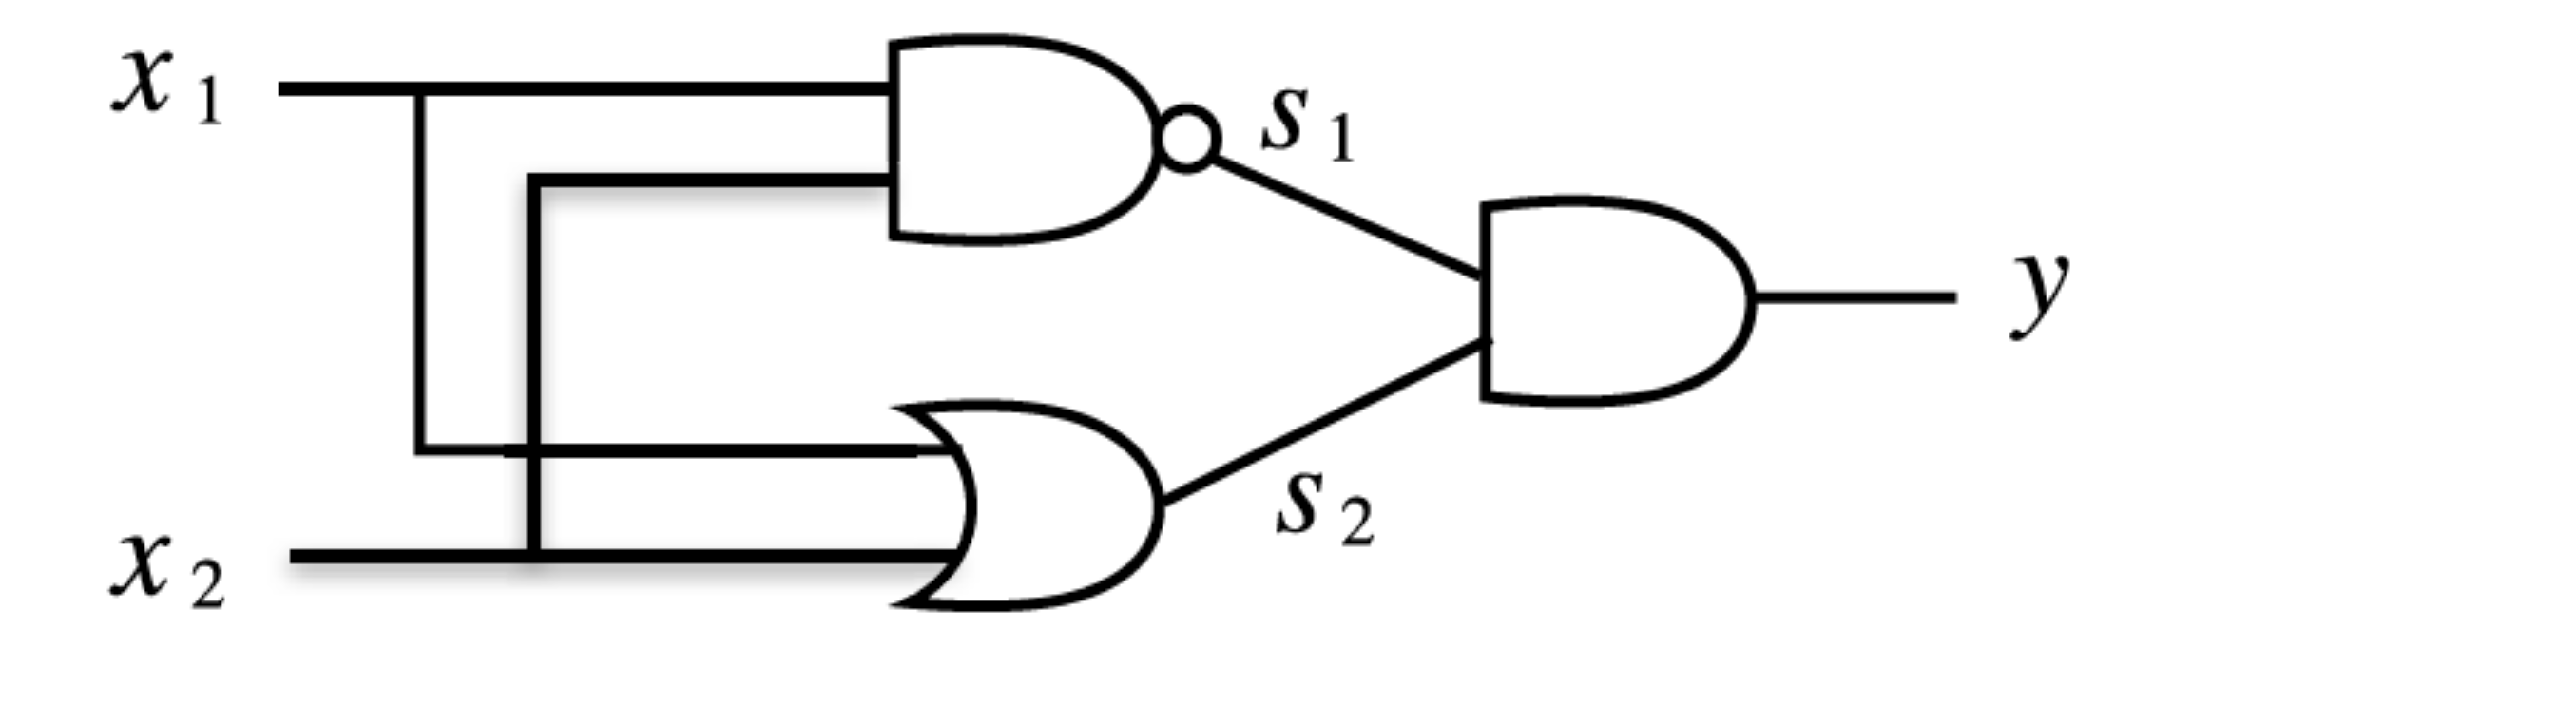

In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [ ]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


# 신경망

In [ ]:
import matplotlib.pylab as plt

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

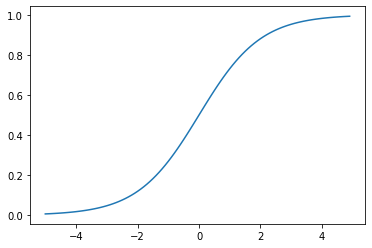

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.show()

In [ ]:
def relu(x):
    return np.maximum(0, x)

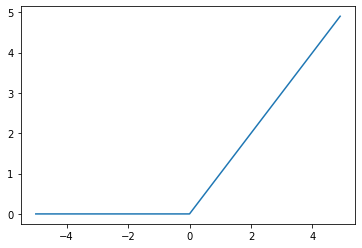

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

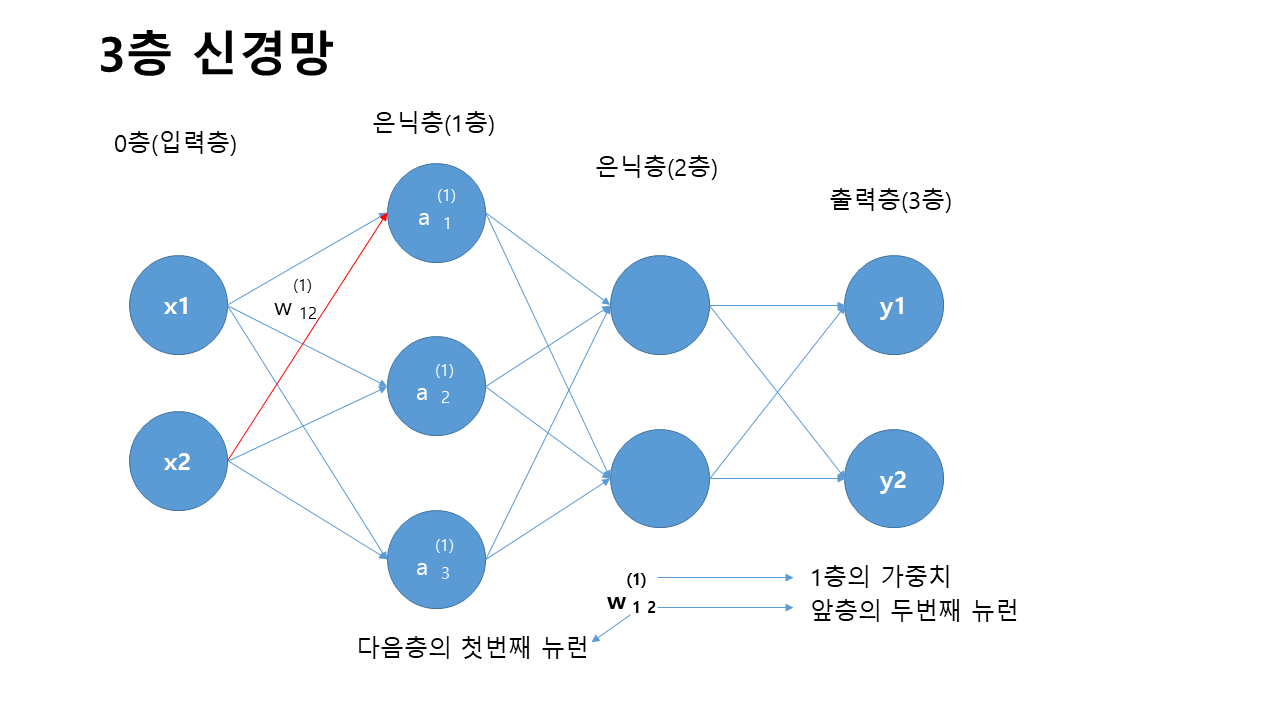

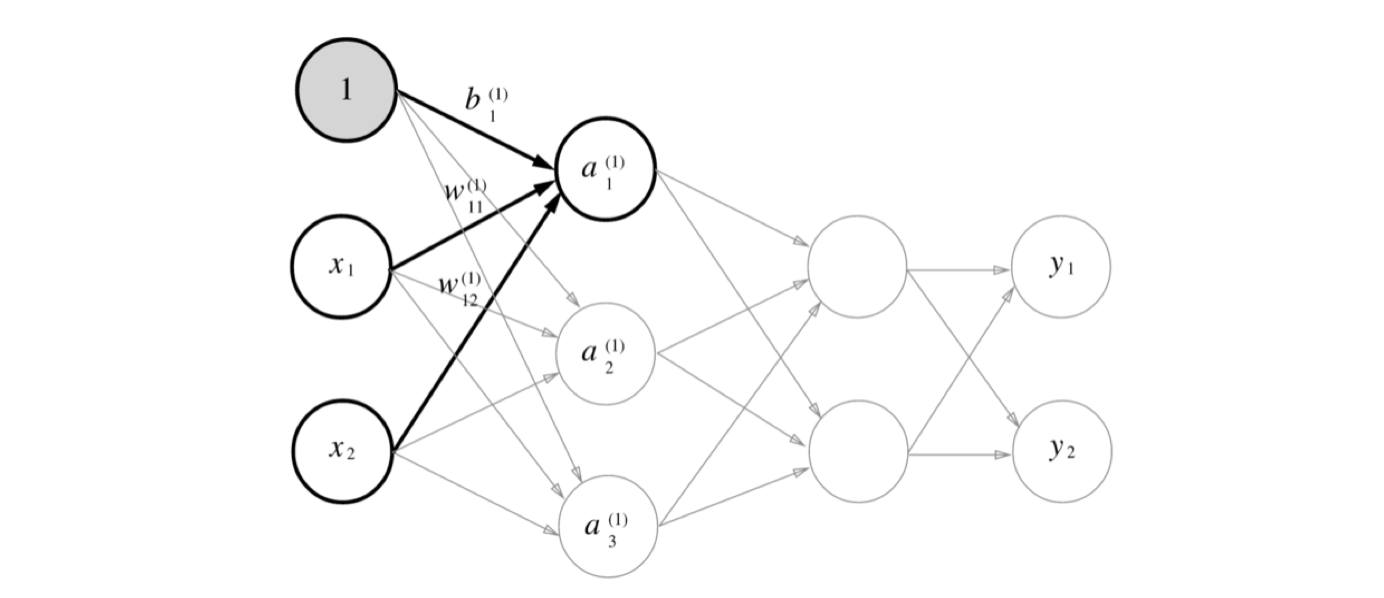

## $$a_1 = w_{11}x_1 + w_{12}x_2 + b_1$$

## $$a_2 = w_{21}x_1 + w_{22}x_2 + b_2$$

## $$a_3 = w_{31}x_1 + w_{32}x_2 + b_3$$


## $$ \left[
\begin{matrix}
    a_1 & a_2 & a_3 \\
\end{matrix}
\right] =  \left[
\begin{matrix}
    x_1 & x_2 \\
\end{matrix}
\right]
\left[
\begin{matrix}
    w_{11} & w_{21} & w_{31} \\
    w_{12} & w_{22} & w_{32} \\
\end{matrix}
\right] + \left[
\begin{matrix}
    b_1 & b_2 & b_3 \\
\end{matrix}
\right] $$

In [ ]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.3, 0.3])   
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [ ]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = a3
    
    return y

In [ ]:
network = init_network()
x = np.array([5.0, 6.0])
y = predict(network, x)
print(y)

[0.33379391 0.7340144 ]


In [ ]:
def softmax(y):    
    f_x = np.exp(y) / np.sum(np.exp(y))
    return f_x

In [ ]:
softmax(y)

array([0.40125937, 0.59874063])